# Практическое задание: Деревья Решений

В этом практическом задании вы будете применять знания о деревьях решений на реальных данных. Выполните задания последовательно, используя подсказки и документацию библиотек при необходимости.

## Цели практического задания:
1. Научиться подготавливать данные для деревьев решений
2. Построить и настроить модель дерева решений
3. Визуализировать и интерпретировать результаты
4. Провести оптимизацию гиперпараметров
5. Оценить производительность модели

## Задание 1: Подготовка данных

1. Импортируйте необходимые библиотеки (numpy, pandas, sklearn, etc.)
2. Загрузите датасет iris из sklearn.datasets
3. Создайте DataFrame с данными и добавьте понятные названия столбцов
4. Проведите базовый анализ данных:
   - Проверьте размер датасета
   - Изучите распределение классов
   - Постройте корреляционную матрицу
   - Визуализируйте распределение признаков

Подсказка: используйте pandas.DataFrame, seaborn.heatmap, plotly для визуализации

Размер датасета: (150, 5)

Распределение классов:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


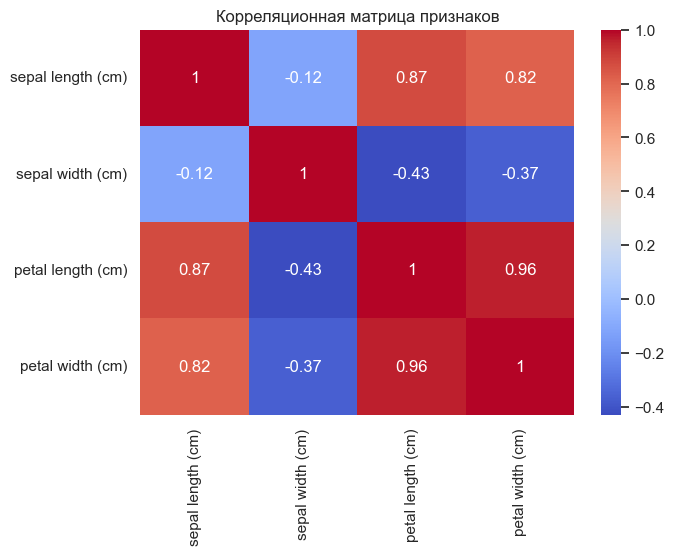

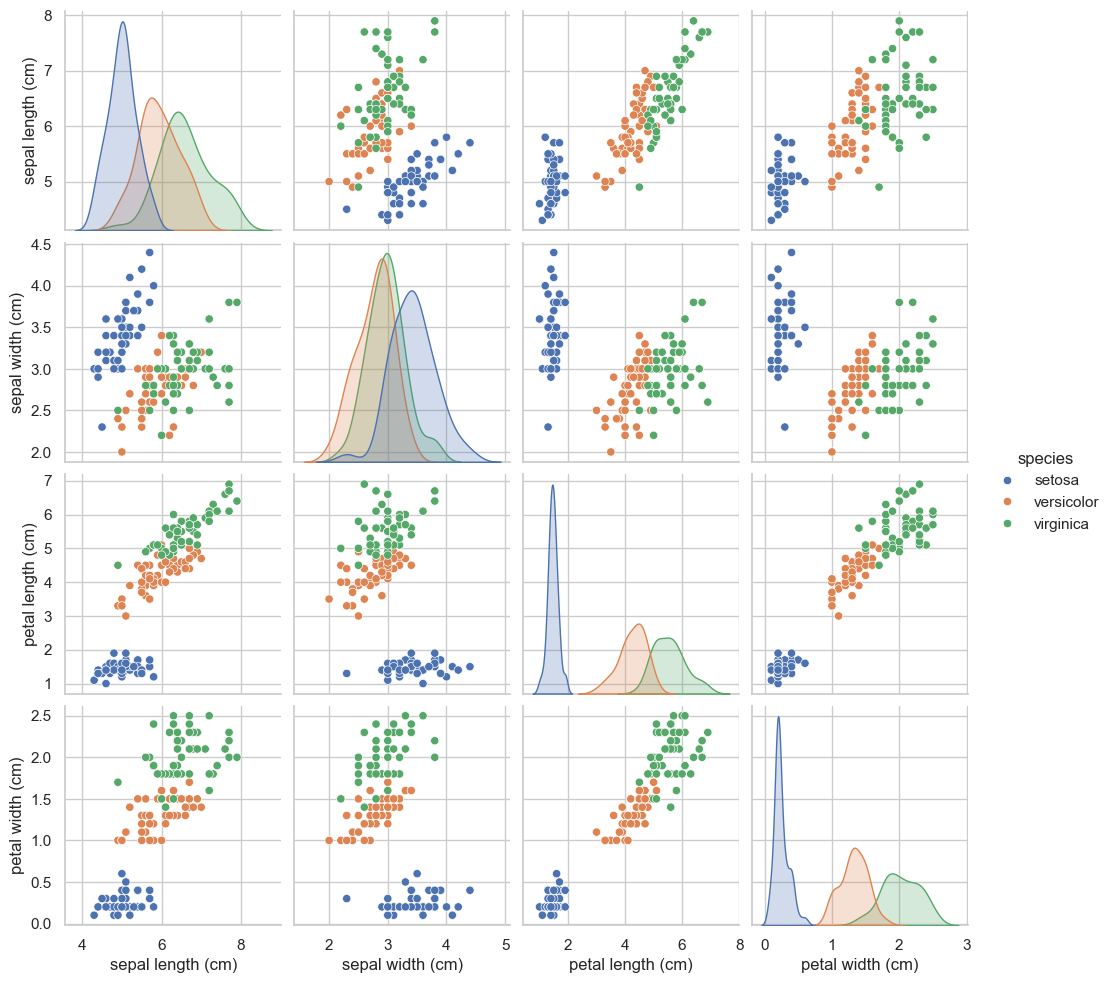

In [1]:
# Ваш код для Задания 1

# 1. Импорт необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import plotly.express as px

# Настройки отображения
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (8, 5)

# 2. Загрузка датасета iris
iris = load_iris()

# 3. Создание DataFrame с понятными названиями
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#  4. Базовый анализ данных 

# Размер датасета
print("Размер датасета:", df.shape)

# Распределение классов
print("\nРаспределение классов:")
print(df['species'].value_counts())

# Корреляционная матрица
plt.figure(figsize=(7, 5))
sns.heatmap(df.iloc[:, :4].corr(), annot=True, cmap="coolwarm")
plt.title("Корреляционная матрица признаков")
plt.show()

# Визуализация распределения признаков — Pairplot
sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

# Plotly: интерактивная визуализация
fig = px.scatter_matrix(
    df,
    dimensions=df.columns[:4],
    color="species",
    title="Интерактивная визуализация признаков Iris"
)
fig.show()


## Задание 2: Построение базовой модели

1. Разделите данные на обучающую и тестовую выборки (test_size=0.2)
2. Создайте и обучите базовое дерево решений без настройки параметров
3. Оцените точность модели на тестовой выборке
4. Выведите отчет о классификации
5. Визуализируйте полученное дерево

Подсказка: используйте train_test_split, DecisionTreeClassifier, classification_report

Accuracy модели: 0.9333333333333333

Отчет о классификации:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



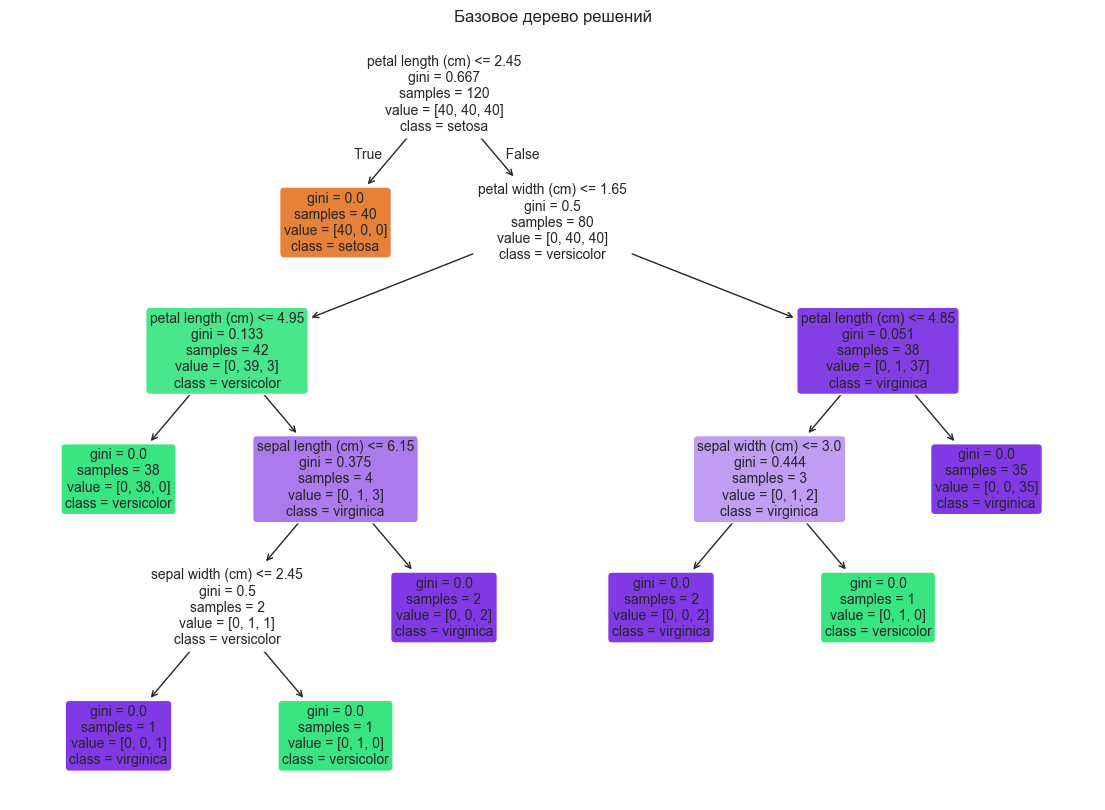

In [2]:
# Ваш код для Задания 2

# Задание 2: Базовое дерево решений

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report

# Загрузка данных
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Разделение данных на train/test
X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Создание и обучение базового дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Предсказание и оценка точности
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy модели:", accuracy)

# Отчет о классификации
print("\nОтчет о классификации:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Визуализация дерева решений
plt.figure(figsize=(14, 10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Базовое дерево решений")
plt.show()


## Задание 3: Анализ важности признаков

1. Получите и визуализируйте важность признаков из вашей модели
2. Создайте столбчатую диаграмму важности признаков
3. Постройте тепловую карту корреляций для топ-5 важных признаков
4. Проанализируйте, есть ли связь между важностью признаков и их статистическими характеристиками

Дополнительно:
- Попробуйте построить модель, используя только 2 самых важных признака
- Сравните производительность с полной моделью

Важность признаков:
              feature  importance
2  petal length (cm)    0.564056
3   petal width (cm)    0.422611
0  sepal length (cm)    0.013333
1   sepal width (cm)    0.000000


C:\Users\user\AppData\Local\Temp\ipykernel_20472\2162920569.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




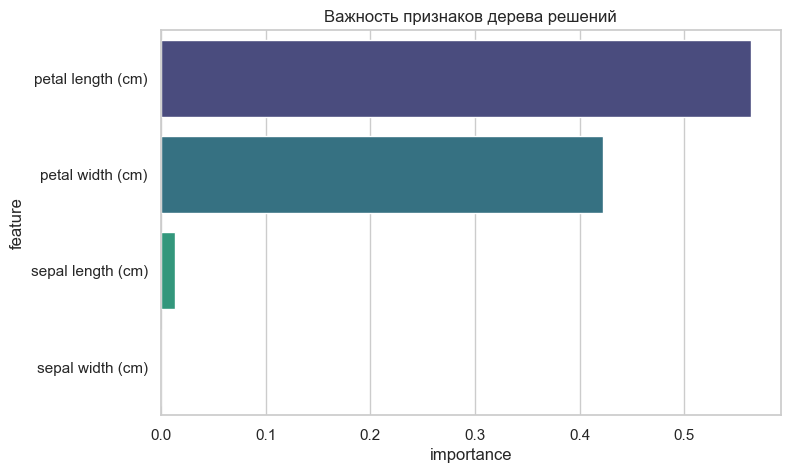

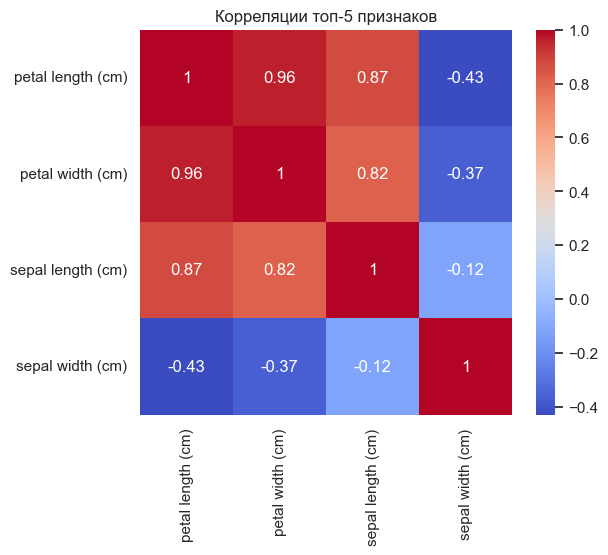


 Модель с 2 самыми важными признаками 
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

 Полная модель 
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [4]:
# Ваш код для Задания 3

# Задание 3: Анализ важности признаков

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#  1. Подготовка данных 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

# Обучение базовой модели дерева
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

#  2. Важность признаков 
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print("Важность признаков:\n", feature_importances)

#  3. Визуализация важности признаков 
plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=feature_importances, palette='viridis')
plt.title("Важность признаков дерева решений")
plt.show()

#  4. Топ-5 признаков и тепловая карта корреляций 
top5_features = feature_importances['feature'].head(5)
corr_top5 = df[top5_features].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_top5, annot=True, cmap='coolwarm')
plt.title("Корреляции топ-5 признаков")
plt.show()

#  5. Попробуем модель только с 2 самыми важными признаками 
top2_features = feature_importances['feature'].head(2)
X_top2 = df[top2_features]

X_train, X_test, y_train, y_test = train_test_split(X_top2, y, test_size=0.2, random_state=42, stratify=y)

model_top2 = DecisionTreeClassifier(random_state=42)
model_top2.fit(X_train, y_train)

y_pred_top2 = model_top2.predict(X_test)

print("\n Модель с 2 самыми важными признаками ")
print("Accuracy:", accuracy_score(y_test, y_pred_top2))
print(classification_report(y_test, y_pred_top2, target_names=iris.target_names))

# 6. Сравнение с полной моделью 
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model_full = DecisionTreeClassifier(random_state=42)
model_full.fit(X_train_full, y_train_full)
y_pred_full = model_full.predict(X_test_full)

print(" Полная модель ")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full, target_names=iris.target_names))


## Задание 4: Оптимизация гиперпараметров

1. Определите сетку параметров для поиска:
   - max_depth: [3, 5, 7, 10]
   - min_samples_split: [2, 5, 10]
   - min_samples_leaf: [1, 2, 4]
   - criterion: ['gini', 'entropy']

2. Используйте GridSearchCV для поиска лучших параметров
3. Визуализируйте результаты поиска по сетке
4. Сравните производительность оптимизированной модели с базовой

Дополнительно:
- Попробуйте добавить другие параметры для оптимизации
- Используйте RandomizedSearchCV для сравнения

Лучшие параметры GridSearchCV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Лучшая точность на CV: 0.9416666666666668

 Оптимизированная модель 
Accuracy на тесте: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



C:\Users\user\AppData\Local\Temp\ipykernel_20472\1218959728.py:59: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




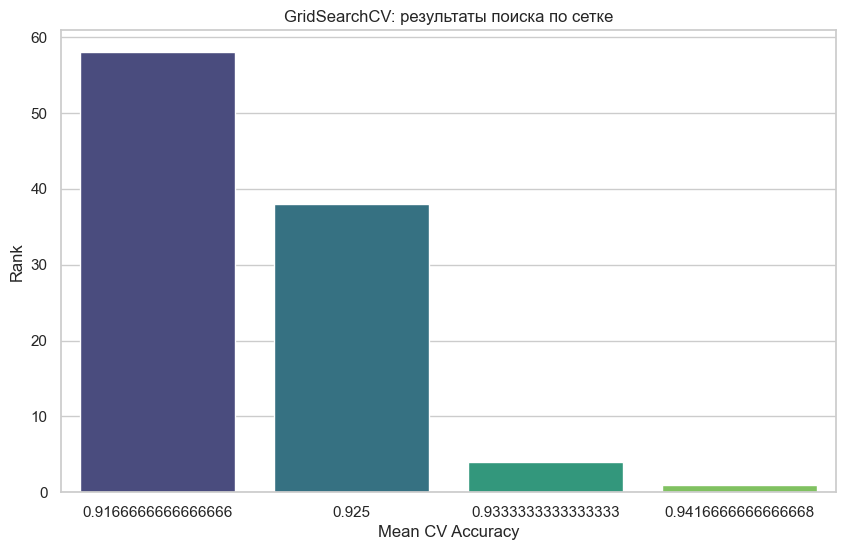

 Базовая модель 
Accuracy на тесте: 0.9333333333333333
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


 RandomizedSearchCV 
Лучшие параметры: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy на тесте: 0.9333333333333333


In [6]:
# Ваш код для Задания 4

# Задание 4: Оптимизация гиперпараметров

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

#  1. Подготовка данных 
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#  2. Сетка параметров 
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

#  3. GridSearchCV 
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры GridSearchCV:", grid_search.best_params_)
print("Лучшая точность на CV:", grid_search.best_score_)

#  4. Оценка на тестовой выборке 
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print("\n Оптимизированная модель ")
print("Accuracy на тесте:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best, target_names=iris.target_names))

#  5. Визуализация результатов поиска 
results_df = pd.DataFrame(grid_search.cv_results_)
# Сортируем по mean_test_score
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='mean_test_score', y='rank_test_score', data=results_df, palette='viridis')
plt.title("GridSearchCV: результаты поиска по сетке")
plt.xlabel("Mean CV Accuracy")
plt.ylabel("Rank")
plt.show()

#  6. Сравнение с базовой моделью 
base_model = DecisionTreeClassifier(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

print(" Базовая модель ")
print("Accuracy на тесте:", accuracy_score(y_test, y_pred_base))
print(classification_report(y_test, y_pred_base, target_names=iris.target_names))

#  7. RandomizedSearchCV 
from scipy.stats import randint

param_dist = {
    'max_depth': randint(2, 10),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'criterion': ['gini', 'entropy']
}

random_search = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("\n RandomizedSearchCV ")
print("Лучшие параметры:", random_search.best_params_)
print("Accuracy на тесте:", accuracy_score(y_test, random_search.best_estimator_.predict(X_test)))


## Задание 5: Оценка модели

1. Постройте кривые обучения для оптимизированной модели
2. Создайте и визуализируйте:
   - ROC-кривую
   - Precision-Recall кривую
   - Матрицу ошибок

3. Проанализируйте результаты:
   - Есть ли признаки переобучения?
   - Какие классы предсказываются лучше/хуже?
   - Какие метрики наиболее важны для данной задачи?

Дополнительно:
- Попробуйте применить cross_val_score с разным количеством фолдов
- Сравните результаты с другими алгоритмами классификации

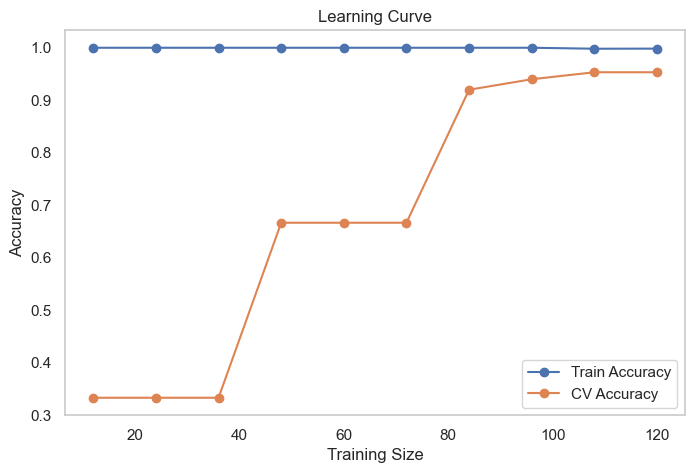

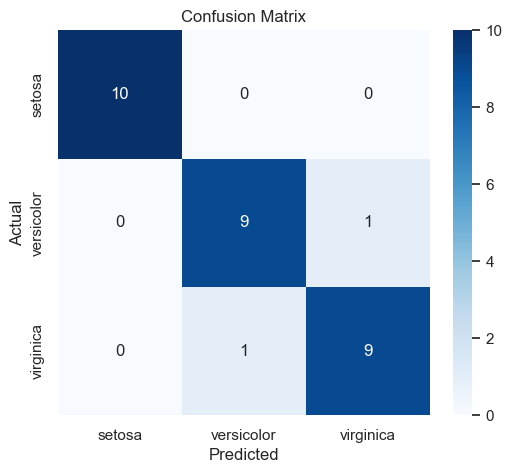

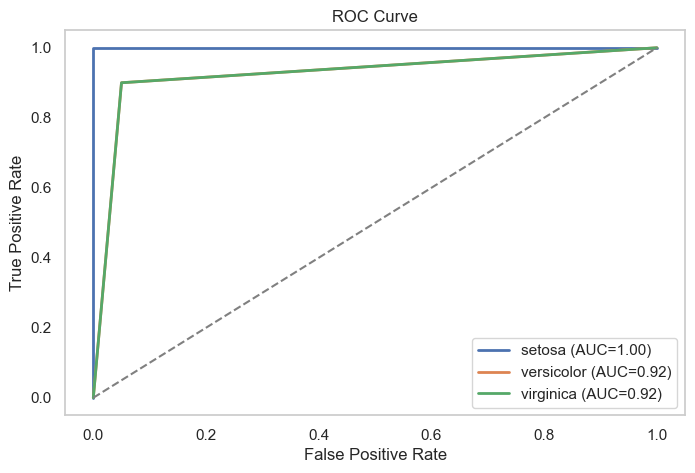

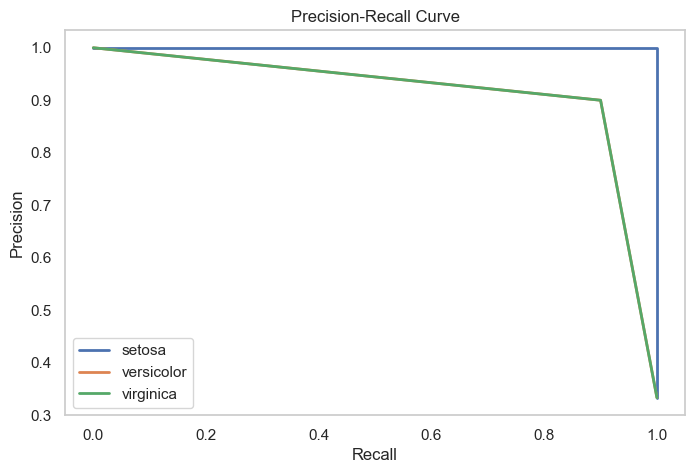

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

3-fold CV accuracy: mean=0.960, std=0.016
5-fold CV accuracy: mean=0.953, std=0.034
10-fold CV accuracy: mean=0.953, std=0.043


In [7]:
# Ваш код для Задания 5

# Задание 5: Оценка модели

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import label_binarize
sns.set(style="whitegrid")

# 1. Подготовка данных
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 2. Обучение модели
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 3. Кривые обучения
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, train_sizes=np.linspace(0.1,1.0,10), scoring='accuracy')
plt.figure(figsize=(8,5))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Train Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='CV Accuracy')
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

# 4. Матрица ошибок
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=iris.target_names, yticklabels=iris.target_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 5. ROC и Precision-Recall кривые
y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_score = model.predict_proba(X_test)

plt.figure(figsize=(8,5))
for i, class_name in enumerate(iris.target_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:,i], y_score[:,i])
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (AUC={auc(fpr,tpr):.2f})')
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8,5))
for i, class_name in enumerate(iris.target_names):
    precision, recall, _ = precision_recall_curve(y_test_bin[:,i], y_score[:,i])
    plt.plot(recall, precision, lw=2, label=class_name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()

# 6. Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# 7. Cross-validation с разными фолдами
for cv in [3,5,10]:
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{cv}-fold CV accuracy: mean={scores.mean():.3f}, std={scores.std():.3f}")


## Дополнительные задания

1. **Обработка несбалансированных данных:**
   - Создайте несбалансированный датасет (удалив часть примеров одного класса)
   - Примените техники работы с несбалансированными данными
   - Сравните результаты

2. **Pruning (обрезка дерева):**
   - Реализуйте post-pruning для вашего дерева
   - Сравните производительность до и после обрезки

3. **Визуализация решений:**
   - Создайте функцию для отображения пути принятия решений для конкретного примера
   - Визуализируйте области решений на плоскости (для 2 признаков)

4. **Сравнение с ансамблями:**
   - Сравните ваше лучшее дерево с Random Forest
   - Проанализируйте различия в производительности и интерпретируемости

Несбалансированные данные:
Accuracy: 0.9545454545454546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.95        22
   macro avg       0.97      0.97      0.97        22
weighted avg       0.96      0.95      0.95        22

Сбалансированные данные (upsampling):
Accuracy: 0.925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.93        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.93      0.93      0.92        40

После обрезки дерева (max_depth=3):
Accuracy: 0.975
              precision    recall  f1-score   support

           0       1.

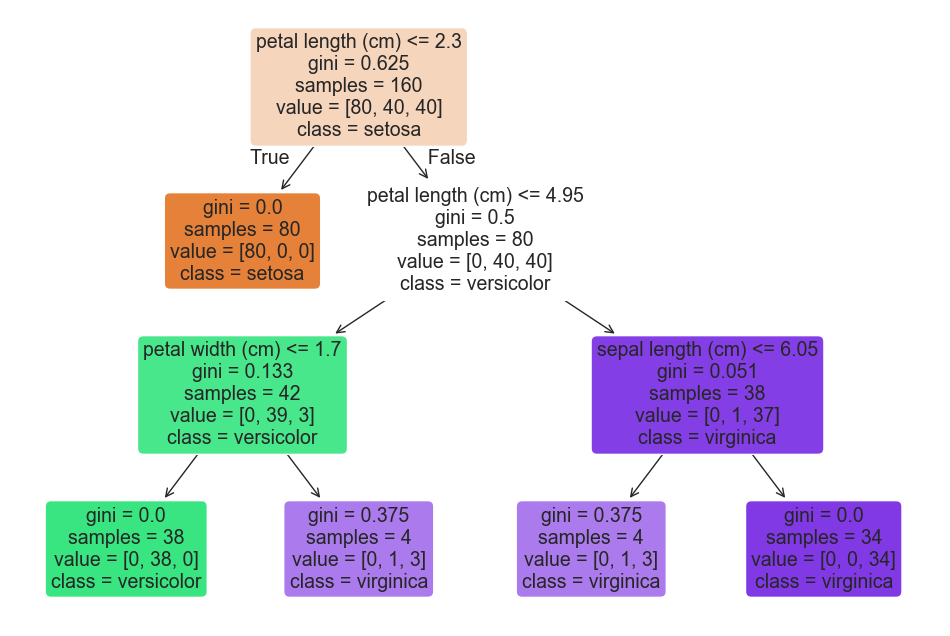

c:\Users\user\miniconda3\envs\digits\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



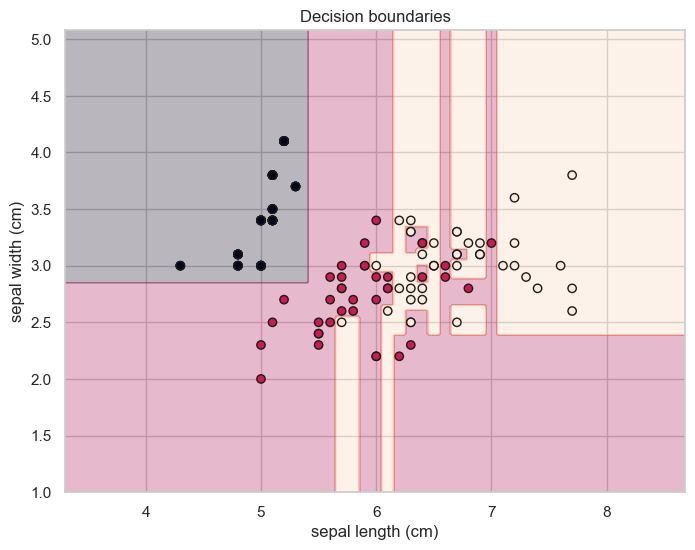

Random Forest:
Accuracy: 0.95
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.95        40
   macro avg       0.93      0.93      0.93        40
weighted avg       0.95      0.95      0.95        40



In [8]:
# Ваш код для дополнительных заданий

# Дополнительные задания по деревьям решений

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

# 1. Подготовка данных
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

X = df.iloc[:, :-1]
y = df['species']

# 1.1 Создание несбалансированного датасета (удалим часть примеров класса 0)
df_unbal = pd.concat([
    df[df['species'] != 0],
    df[df['species'] == 0].sample(10, random_state=42)  # оставим только 10 примеров класса 0
])
X_unbal = df_unbal.iloc[:, :-1]
y_unbal = df_unbal['species']

X_train, X_test, y_train, y_test = train_test_split(X_unbal, y_unbal, test_size=0.2, random_state=42, stratify=y_unbal)

# 1.2 Обучение базового дерева на несбалансированных данных
model_unbal = DecisionTreeClassifier(random_state=42)
model_unbal.fit(X_train, y_train)
y_pred_unbal = model_unbal.predict(X_test)
print("Несбалансированные данные:")
print("Accuracy:", accuracy_score(y_test, y_pred_unbal))
print(classification_report(y_test, y_pred_unbal))

# 1.3 Применение техники балансировки (upsampling меньшего класса)
df_majority = df_unbal[df_unbal['species'] != 0]
df_minority = df_unbal[df_unbal['species'] == 0]

df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])

X_bal = df_balanced.iloc[:, :-1]
y_bal = df_balanced['species']

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42, stratify=y_bal)

model_bal = DecisionTreeClassifier(random_state=42)
model_bal.fit(X_train, y_train)
y_pred_bal = model_bal.predict(X_test)
print("Сбалансированные данные (upsampling):")
print("Accuracy:", accuracy_score(y_test, y_pred_bal))
print(classification_report(y_test, y_pred_bal))

# 2. Pruning (пост-обрезка дерева)
model_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
model_pruned.fit(X_train, y_train)
y_pred_pruned = model_pruned.predict(X_test)
print("После обрезки дерева (max_depth=3):")
print("Accuracy:", accuracy_score(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))

plt.figure(figsize=(12,8))
plot_tree(model_pruned, feature_names=X.columns, class_names=iris.target_names, filled=True, rounded=True)
plt.show()

# 3. Визуализация решений для 2 признаков
def plot_decision_boundary(model, X, y, features):
    x_min, x_max = X[features[0]].min() - 1, X[features[0]].max() + 1
    y_min, y_max = X[features[1]].min() - 1, X[features[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[features[0]], X[features[1]], c=y, edgecolor='k')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title("Decision boundaries")
    plt.show()

# Используем только первые два признака
X_train2 = X_train.iloc[:, :2]
X_test2 = X_test.iloc[:, :2]
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train2, y_train)
plot_decision_boundary(model2, X_train2, y_train, X_train2.columns)

# 4. Сравнение с ансамблями (Random Forest)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
